In [2]:
# importing libraries
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from scipy.stats import norm

# fetching data
import yfinance as yf

#for plotting the data 
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab
from tabulate import tabulate

In [3]:
stocks = ['BND', 'SPY', 'GLD', 'QQQ', 'VTI' ]
years = 1
endDate = dt.datetime.now()
startDate = endDate- dt.timedelta(days = 365*years)
adj_close_stock = yf.download(stocks, start=startDate, end=endDate)['Adj Close']

print(adj_close_stock)

[*********************100%***********************]  5 of 5 completed


Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2023-12-18  70.666275  187.850006  405.114594  467.560974  232.948776
2023-12-19  70.801346  189.130005  407.184570  470.404144  234.654037
2023-12-20  71.032875  188.100006  401.133911  463.885590  231.154800
2023-12-21  71.023239  189.429993  405.801270  468.284149  233.710785
2023-12-22  70.975815  190.270004  406.408356  469.225250  234.245346
...               ...         ...         ...         ...         ...
2024-12-09  73.489998  245.360001  522.380005  604.679993  300.519989
2024-12-10  73.410004  248.589996  520.599976  602.799988  299.390015
2024-12-11  73.250000  250.960007  529.919983  607.460022  301.799988
2024-12-12  72.959999  247.279999  526.500000  604.330017  300.079987
2024-12-13  72.669998  244.289993  530.530029  604.210022  299.929993

[250 rows x 5 columns]


In [4]:
# calculating Daily Log Returns and droppingNAs
log_returns = np.log(adj_close_stock/ adj_close_stock.shift(1))
log_returns =log_returns.dropna()
print(log_returns)

Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2023-12-19  0.001910  0.006791  0.005097  0.006062  0.007294
2023-12-20  0.003265 -0.005461 -0.014971 -0.013954 -0.015025
2023-12-21 -0.000136  0.007046  0.011568  0.009437  0.010997
2023-12-22 -0.000668  0.004425  0.001495  0.002008  0.002285
2023-12-26  0.000954  0.007592  0.006103  0.004214  0.004932
...              ...       ...       ...       ...       ...
2024-12-09 -0.002989  0.009871 -0.007818 -0.005163 -0.006402
2024-12-10 -0.001089  0.013078 -0.003413 -0.003114 -0.003767
2024-12-11 -0.002182  0.009489  0.017744  0.007701  0.008017
2024-12-12 -0.003967 -0.014772 -0.006475 -0.005166 -0.005715
2024-12-13 -0.003983 -0.012165  0.007625 -0.000199 -0.000500

[249 rows x 5 columns]


In [6]:
# Creating an Equally Weighted Portfolio
portfolio_value = 100000
weights = np.array([1/len(stocks)]*len(stocks))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [48]:
#Calculating Historical Returns 
historical_returns = (log_returns*weights).sum(axis=1)
print(historical_returns)

day = 50

range_returns = historical_returns.rolling(window = day).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2023-12-19    0.005431
2023-12-20   -0.009229
2023-12-21    0.007782
2023-12-22    0.001909
2023-12-26    0.004759
                ...   
2024-12-09   -0.002500
2024-12-10    0.000339
2024-12-11    0.008154
2024-12-12   -0.007219
2024-12-13   -0.001844
Length: 249, dtype: float64
Date
2024-03-01    0.055243
2024-03-04    0.051425
2024-03-05    0.055169
2024-03-06    0.052824
2024-03-07    0.059307
                ...   
2024-12-09    0.035398
2024-12-10    0.035669
2024-12-11    0.047582
2024-12-12    0.040286
2024-12-13    0.040406
Length: 200, dtype: float64


In [49]:
confidence_interval = 0.99

VaR = np.percentile(range_returns, 100- (confidence_interval*100))
VaR


0.004764006413597572

In [50]:
VaR= VaR*portfolio_value
print(VaR)

476.40064135975723


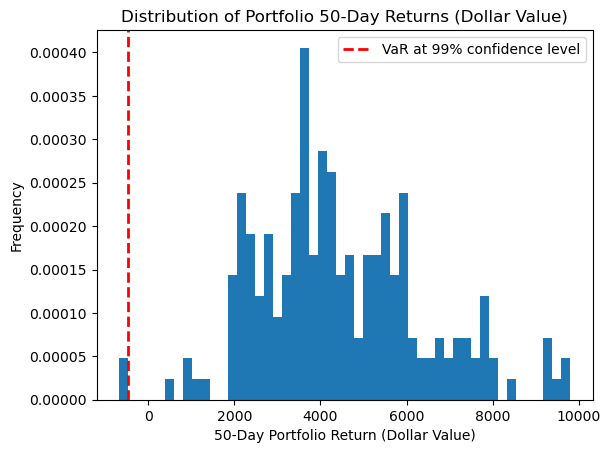

In [51]:
return_window = day
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

1956.616281214119


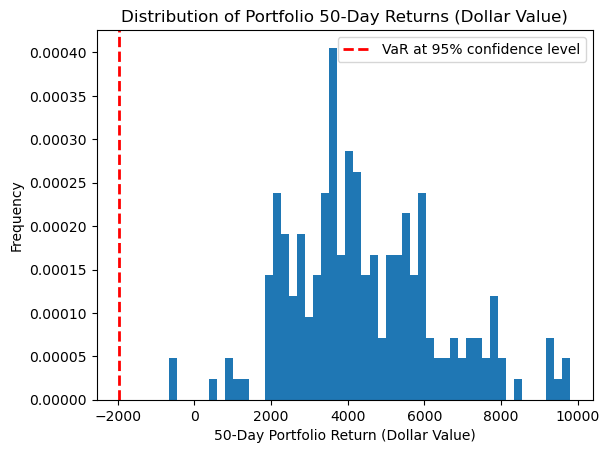

In [52]:
confidence_interval = 0.95

VaR = np.percentile(range_returns, 100- (confidence_interval*100))
VaR
VaR= VaR*portfolio_value
print(VaR)
return_window = day
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()